In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import healpy as hp
from scipy.ndimage import gaussian_filter
from astropy.io import fits

# Plot simulated lensing maps

In [2]:
convergence_example = hp.read_map(os.getcwd() + '/original_lensing_maps/kappa_mapsA/kappa_nicaea23.fits')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


In [3]:
convergence_example_smoothed = hp.smoothing(convergence_example, sigma=np.deg2rad(5./60.))

Sigma is 5.000000 arcmin (0.001454 rad) 
-> fwhm is 11.774100 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/ucapnje/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  newcm.set_over(newcm(1.0))
/Users/ucapnje/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  newcm.set_under(bgcolor)
/Users/ucapnje/anaconda3/lib/python3.6/site-packages/healpy/projaxes.py:909: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to 

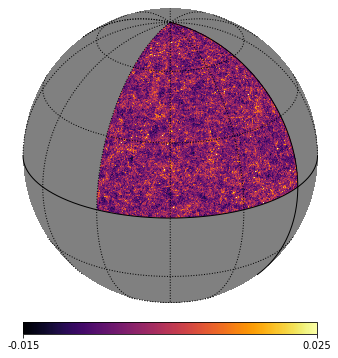

In [4]:
_ = hp.orthview(convergence_example_smoothed, rot=(60,25), min=-0.015,max=0.025, 
                half_sky=True, cmap='inferno', title=None, xsize=1600)
_ = hp.graticule(verbose=False)

# Plot example DES SV simulated

In [5]:
e1_example = np.load(os.getcwd() + '/simulated_sv_maps/outputs/outputA23_e111.npy')
e2_example = np.load(os.getcwd() + '/simulated_sv_maps/outputs/outputA23_e211.npy')
e1_noisy_example = np.load(os.getcwd() + '/simulated_sv_maps/outputs/outputA23_e1_noisy11.npy')
e2_noisy_example = np.load(os.getcwd() + '/simulated_sv_maps/outputs/outputA23_e2_noisy11.npy')

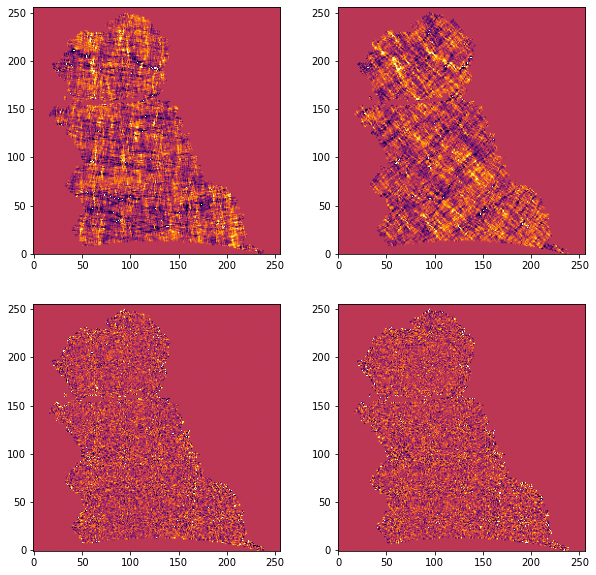

In [6]:
_ = plt.figure(figsize=(10,10))
_ = plt.subplot(2,2,1), plt.imshow(e1_example, cmap='inferno', origin='lower', clim=(-0.015,0.015))
_ = plt.subplot(2,2,2), plt.imshow(e2_example, cmap='inferno', origin='lower', clim=(-0.015,0.015))
_ = plt.subplot(2,2,3), plt.imshow(e1_noisy_example, cmap='inferno', origin='lower', clim=(-0.15,0.15))
_ = plt.subplot(2,2,4), plt.imshow(e2_noisy_example, cmap='inferno', origin='lower', clim=(-0.15,0.15))

In [7]:
kappa_example = np.load(os.getcwd() + '/simulated_sv_maps/outputs/outputA23_kappa11.npy')

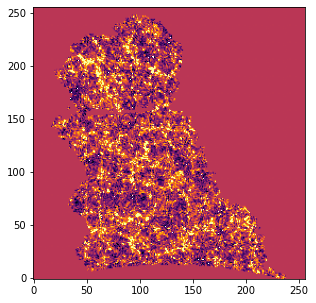

In [8]:
_ = plt.figure(figsize=(5,5))
_ = plt.imshow(kappa_example, cmap='inferno', origin='lower', clim=(-0.015,0.015))

# Plot parameter values

In [84]:
params = np.loadtxt('original_lensing_maps/parameter_values.txt', delimiter=',').T

In [87]:
file_namesA = os.listdir(os.getcwd() +'/original_lensing_maps/kappa_mapsA')
file_namesB = os.listdir(os.getcwd() +'/original_lensing_maps/kappa_mapsB')

suffixA = [np.int(file_name[12:-5]) for file_name in file_namesA]
suffixB = [np.int(file_name[12:-5]) for file_name in file_namesB]

file_namesA = [x for _,x in sorted(zip(suffixA,file_namesA))]
file_namesB = [x for _,x in sorted(zip(suffixB,file_namesB))]

In [89]:
maps_variance = []

for file_name in file_namesA:
    map_file = os.getcwd() + '/original_lensing_maps/kappa_mapsA/' + file_name
    convergence_temp = hp.read_map(map_file, verbose=False)
    maps_variance.append(np.var(convergence_temp[np.where(convergence_temp!=hp.UNSEEN)]))
    
for file_name in file_namesB:
    map_file = os.getcwd() + '/original_lensing_maps/kappa_mapsB/' + file_name
    convergence_temp = hp.read_map(map_file, verbose=False)
    maps_variance.append(np.var(convergence_temp[np.where(convergence_temp!=hp.UNSEEN)]))

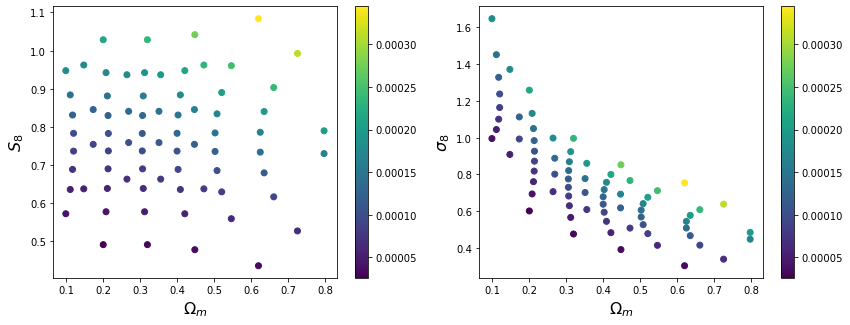

In [91]:
_ = plt.figure(figsize=(14,5)), plt.subplot(1,2,1)
_ = plt.scatter(params[0], params[2], c = maps_variance), plt.colorbar()
_ = plt.xlabel(r'$\Omega_m$', fontsize=16), plt.ylabel(r'$S_8$', fontsize=16)
_ = plt.subplot(1,2,2)
_ = plt.scatter(params[0], params[1], c = maps_variance), plt.colorbar()
_ = plt.xlabel(r'$\Omega_m$', fontsize=16), plt.ylabel(r'$\sigma_8$', fontsize=16)